Created directory structure at: C:\Users\adars\Downloads\SAR-to-EO\split_dataset

TESTING STRATEGY: RANDOM
Created directory structure at: C:\Users\adars\Downloads\SAR-to-EO\split_dataset\random_split
Starting dataset split with strategy: random
Split ratios: {'train': 0.75, 'val': 0.15, 'test': 0.1}
Found 200 matching SAR-EO pairs
Applying random split strategy...

Validating splits...

Copying files to split directories...
Copying 150 pairs to train split...


Copying train: 100%|█████████████████████████████████████████████████████████████████| 150/150 [00:03<00:00, 41.86it/s]


Copying 30 pairs to val split...


Copying val: 100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.26it/s]


Copying 20 pairs to test split...


Copying test: 100%|████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 41.35it/s]


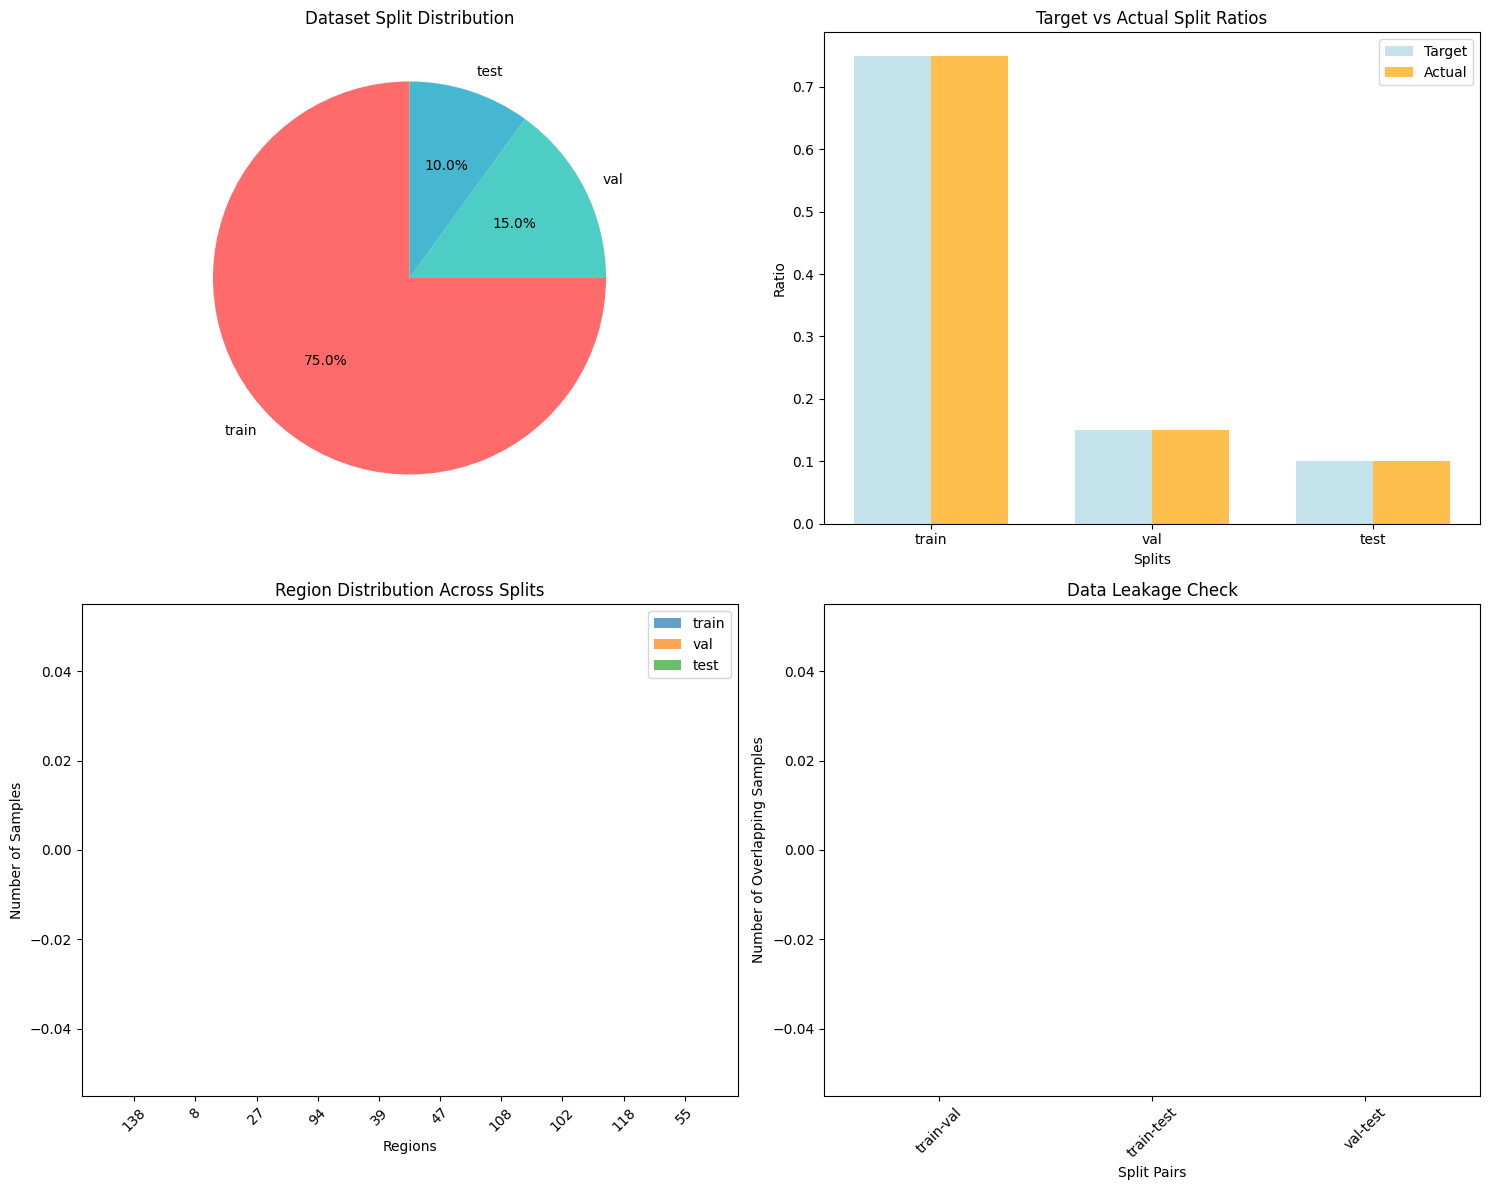


DATASET SPLITTING SUMMARY
Strategy: RANDOM
Random Seed: 42

Split Sizes:
  TRAIN: 150 samples (75.0%) - Target: 75.0%
  VAL: 30 samples (15.0%) - Target: 15.0%
  TEST: 20 samples (10.0%) - Target: 10.0%

Data Leakage Check: ✅ CLEAN

Files successfully copied:
  TRAIN: 150 pairs
  VAL: 30 pairs
  TEST: 20 pairs

Output directory: C:\Users\adars\Downloads\SAR-to-EO\split_dataset\random_split
Statistics saved to: split_statistics.json
Visualizations saved to: split_statistics.png

TESTING STRATEGY: GEOGRAPHIC
Created directory structure at: C:\Users\adars\Downloads\SAR-to-EO\split_dataset\geographic_split
Starting dataset split with strategy: geographic
Split ratios: {'train': 0.75, 'val': 0.15, 'test': 0.1}
Found 200 matching SAR-EO pairs
Applying geographic split strategy...
Region 116 (10 samples) -> train
Region 55 (9 samples) -> val
Region 94 (9 samples) -> test
Region 138 (8 samples) -> train
Region 118 (7 samples) -> train
Region 47 (7 samples) -> train
Region 75 (7 samples) -> tr

Copying train: 100%|████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 184.82it/s]


Copying 30 pairs to val split...


Copying val: 100%|████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 162.57it/s]


Copying 21 pairs to test split...


Copying test: 100%|███████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 144.59it/s]


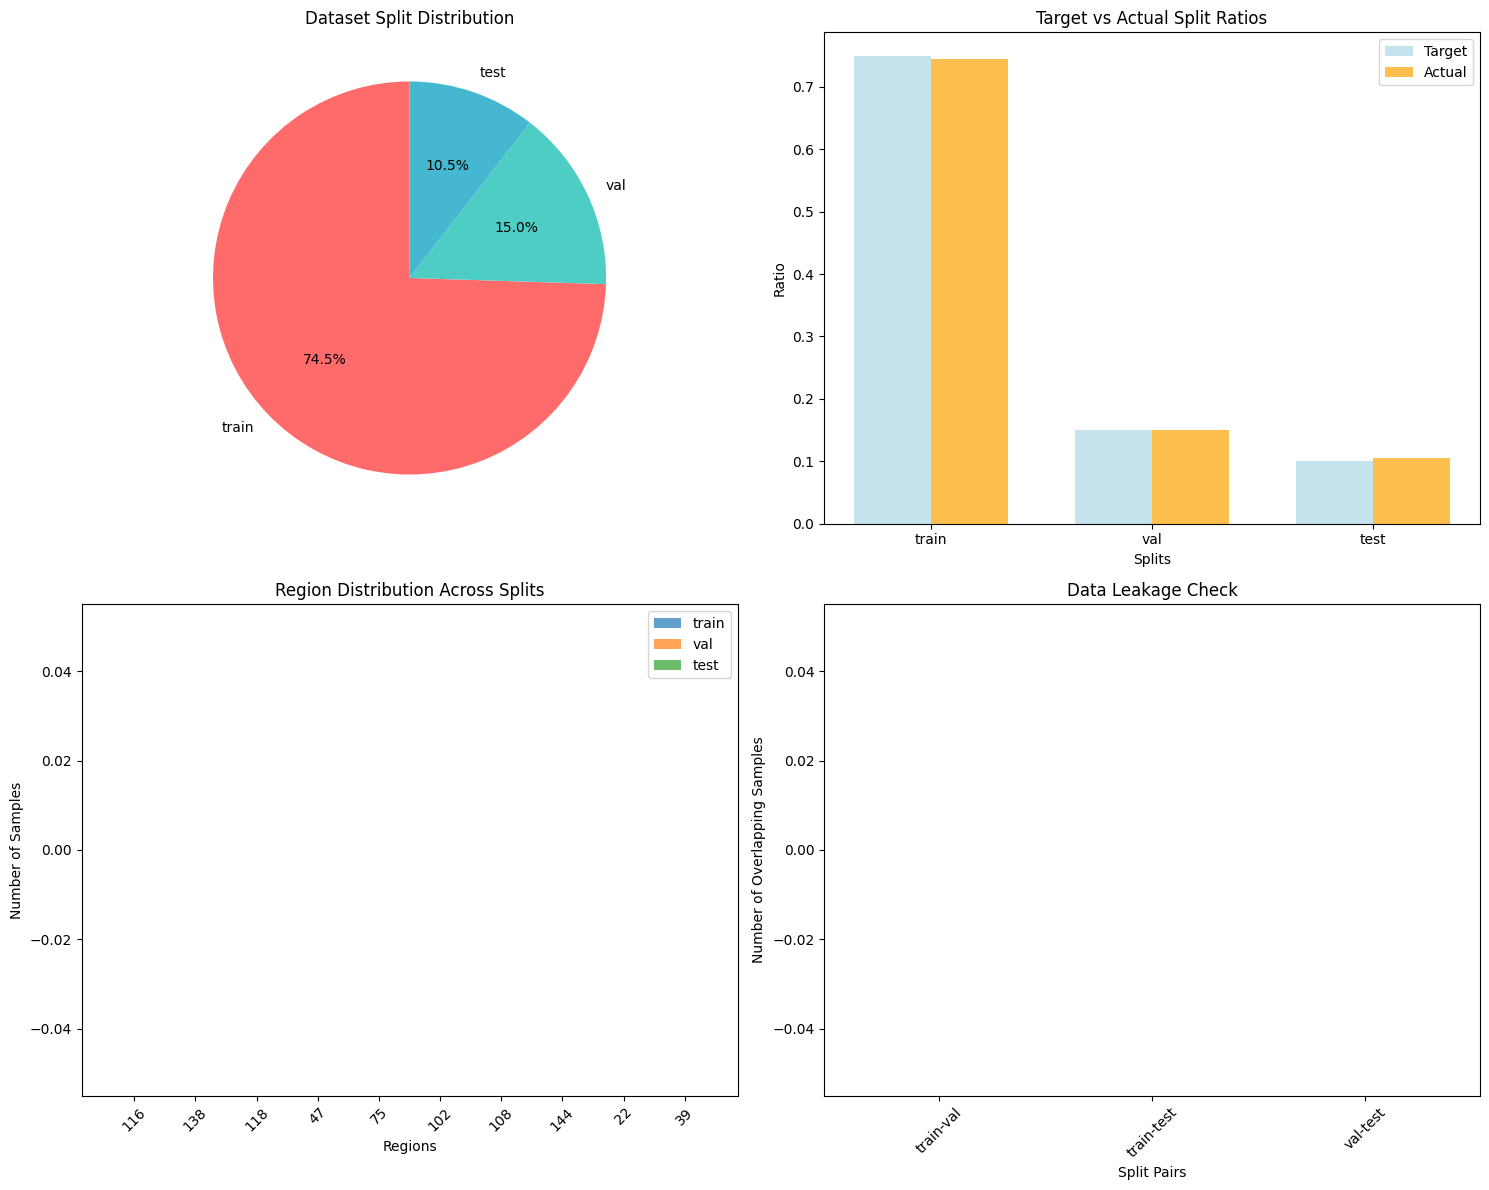


DATASET SPLITTING SUMMARY
Strategy: GEOGRAPHIC
Random Seed: 42

Split Sizes:
  TRAIN: 149 samples (74.5%) - Target: 75.0%
  VAL: 30 samples (15.0%) - Target: 15.0%
  TEST: 21 samples (10.5%) - Target: 10.0%

Data Leakage Check: ✅ CLEAN

Files successfully copied:
  TRAIN: 149 pairs
  VAL: 30 pairs
  TEST: 21 pairs

Output directory: C:\Users\adars\Downloads\SAR-to-EO\split_dataset\geographic_split
Statistics saved to: split_statistics.json
Visualizations saved to: split_statistics.png

TESTING STRATEGY: STRATIFIED
Created directory structure at: C:\Users\adars\Downloads\SAR-to-EO\split_dataset\stratified_split
Starting dataset split with strategy: stratified
Split ratios: {'train': 0.75, 'val': 0.15, 'test': 0.1}
Found 200 matching SAR-EO pairs
Applying stratified split strategy...
Region 102: 6 total -> train:4, val:0, test:2
Region 103: 3 total -> train:2, val:0, test:1
Region 104: 1 total -> train:0, val:0, test:1
Region 107: 3 total -> train:2, val:0, test:1
Region 108: 6 total ->

Copying train: 100%|████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 193.82it/s]


Copying 7 pairs to val split...


Copying val: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 173.48it/s]


Copying 61 pairs to test split...


Copying test: 100%|███████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 169.31it/s]


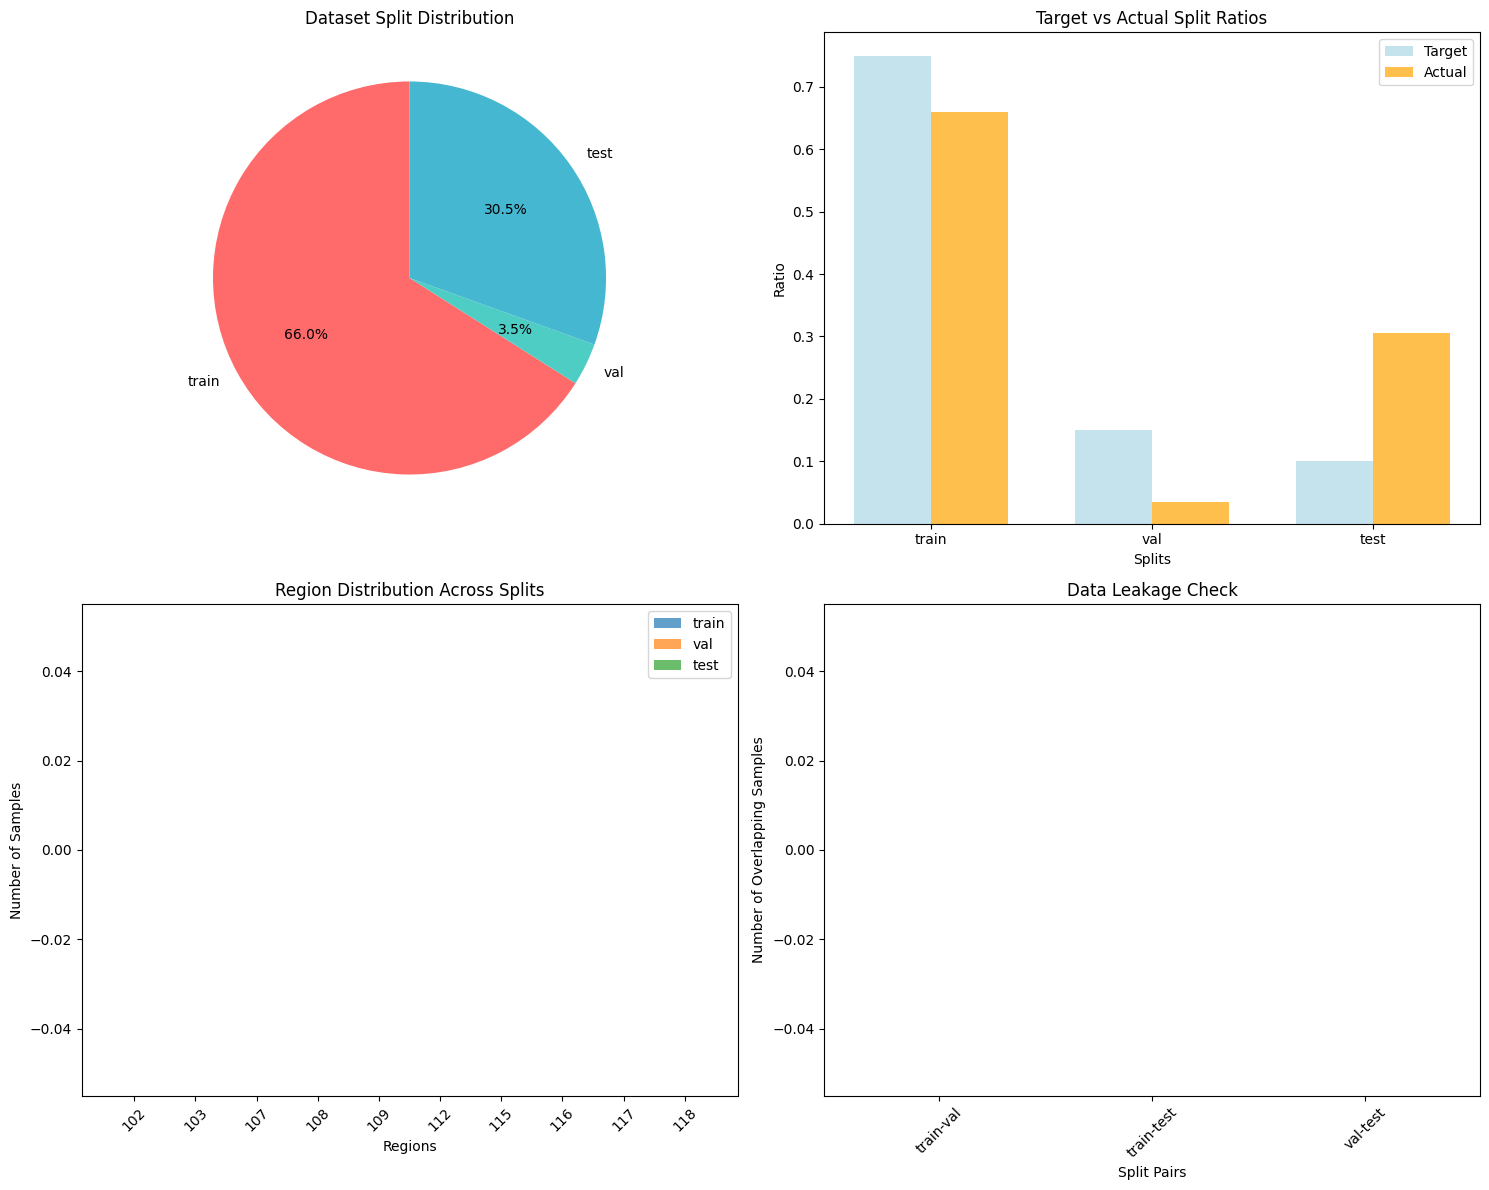


DATASET SPLITTING SUMMARY
Strategy: STRATIFIED
Random Seed: 42

Split Sizes:
  TRAIN: 132 samples (66.0%) - Target: 75.0%
  VAL: 7 samples (3.5%) - Target: 15.0%
  TEST: 61 samples (30.5%) - Target: 10.0%

Data Leakage Check: ✅ CLEAN

Files successfully copied:
  TRAIN: 132 pairs
  VAL: 7 pairs
  TEST: 61 pairs

Output directory: C:\Users\adars\Downloads\SAR-to-EO\split_dataset\stratified_split
Statistics saved to: split_statistics.json
Visualizations saved to: split_statistics.png


In [1]:
import os
import shutil
import random
import json
from pathlib import Path
from typing import Dict, List, Tuple, Optional
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re

class SARGeoDataSplitter:
    """
    Comprehensive data splitting pipeline for SAR-EO datasets
    Supports multiple splitting strategies with no data leakage
    """
    
    def __init__(self, sar_folder: str, eo_folder: str, output_folder: str):
        self.sar_folder = Path(sar_folder)
        self.eo_folder = Path(eo_folder)
        self.output_folder = Path(output_folder)
        
        # Create output directory structure
        self.splits = ['train', 'val', 'test']
        self.create_directory_structure()
        
        # Split configuration
        self.split_config = {
            'ratios': {
                'train': 0.75,
                'val': 0.15,
                'test': 0.10
            },
            'strategy': 'random',  # 'random', 'geographic', 'temporal', 'stratified'
            'seed': 42,
            'ensure_pairs': True
        }
        
        # Set random seed for reproducibility
        random.seed(self.split_config['seed'])
        np.random.seed(self.split_config['seed'])
        
    def create_directory_structure(self):
        """Create train/val/test directory structure"""
        for split in self.splits:
            (self.output_folder / split / 'SAR').mkdir(parents=True, exist_ok=True)
            (self.output_folder / split / 'EO').mkdir(parents=True, exist_ok=True)
        
        print(f"Created directory structure at: {self.output_folder}")
    
    def find_matching_pairs(self) -> List[Tuple[str, str]]:
        """Find matching SAR-EO file pairs"""
        sar_files = list(self.sar_folder.glob("*.tif"))
        eo_files = list(self.eo_folder.glob("*.tif"))
        
        # Create dictionaries for matching
        sar_dict = {}
        eo_dict = {}
        
        # Extract base patterns from filenames
        for sar_file in sar_files:
            name = sar_file.stem
            parts = name.split('_')
            if len(parts) >= 4:
                # Extract base pattern (remove sensor identifier)
                base_pattern = f"{parts[0]}_{parts[1]}_{parts[3]}_{parts[4]}"
                sar_dict[base_pattern] = sar_file.name
        
        for eo_file in eo_files:
            name = eo_file.stem
            parts = name.split('_')
            if len(parts) >= 4:
                base_pattern = f"{parts[0]}_{parts[1]}_{parts[3]}_{parts[4]}"
                eo_dict[base_pattern] = eo_file.name
        
        # Find matching pairs
        matching_pairs = []
        for pattern in sar_dict:
            if pattern in eo_dict:
                matching_pairs.append((sar_dict[pattern], eo_dict[pattern]))
        
        print(f"Found {len(matching_pairs)} matching SAR-EO pairs")
        return matching_pairs
    
    def extract_metadata(self, pairs: List[Tuple[str, str]]) -> Dict:
        """Extract metadata for stratified splitting"""
        metadata = {
            'regions': [],
            'seasons': [],
            'patches': [],
            'quality_scores': []
        }
        
        for sar_file, eo_file in pairs:
            # Extract region ID (assuming format: ROIs2017_season_sensor_REGION_pPATCH)
            sar_parts = sar_file.replace('.tif', '').split('_')
            
            if len(sar_parts) >= 5:
                season = sar_parts[1]  # winter, spring, etc.
                region = sar_parts[3]   # region ID
                patch = sar_parts[4]    # patch ID
                
                metadata['seasons'].append(season)
                metadata['regions'].append(region)
                metadata['patches'].append(patch)
                
                # Simple quality score based on region and patch
                # You can replace this with actual quality metrics
                quality_score = hash(f"{region}_{patch}") % 5  # 0-4 quality levels
                metadata['quality_scores'].append(quality_score)
        
        return metadata
    
    def random_split(self, pairs: List[Tuple[str, str]]) -> Dict[str, List[Tuple[str, str]]]:
        """Random split strategy"""
        print("Applying random split strategy...")
        
        # Shuffle pairs
        shuffled_pairs = pairs.copy()
        random.shuffle(shuffled_pairs)
        
        # Calculate split sizes
        total = len(shuffled_pairs)
        train_size = int(total * self.split_config['ratios']['train'])
        val_size = int(total * self.split_config['ratios']['val'])
        
        # Split data
        splits = {
            'train': shuffled_pairs[:train_size],
            'val': shuffled_pairs[train_size:train_size + val_size],
            'test': shuffled_pairs[train_size + val_size:]
        }
        
        return splits
    
    def geographic_split(self, pairs: List[Tuple[str, str]]) -> Dict[str, List[Tuple[str, str]]]:
        """Geographic split strategy - separate by regions"""
        print("Applying geographic split strategy...")
        
        # Group pairs by region
        region_groups = defaultdict(list)
        for sar_file, eo_file in pairs:
            sar_parts = sar_file.replace('.tif', '').split('_')
            if len(sar_parts) >= 4:
                region = sar_parts[3]
                region_groups[region].append((sar_file, eo_file))
        
        # Sort regions by number of samples (for consistent splitting)
        sorted_regions = sorted(region_groups.keys(), key=lambda x: len(region_groups[x]), reverse=True)
        
        # Allocate regions to splits
        splits = {'train': [], 'val': [], 'test': []}
        total_samples = len(pairs)
        
        current_counts = {'train': 0, 'val': 0, 'test': 0}
        target_counts = {
            'train': int(total_samples * self.split_config['ratios']['train']),
            'val': int(total_samples * self.split_config['ratios']['val']),
            'test': int(total_samples * self.split_config['ratios']['test'])
        }
        
        for region in sorted_regions:
            region_pairs = region_groups[region]
            region_size = len(region_pairs)
            
            # Determine which split needs this region most
            remaining_ratios = {}
            for split_name in splits.keys():
                remaining = target_counts[split_name] - current_counts[split_name]
                remaining_ratios[split_name] = remaining / max(1, target_counts[split_name])
            
            # Assign to split with highest remaining ratio
            target_split = max(remaining_ratios.keys(), key=lambda x: remaining_ratios[x])
            
            splits[target_split].extend(region_pairs)
            current_counts[target_split] += region_size
            
            print(f"Region {region} ({region_size} samples) -> {target_split}")
        
        return splits
    
    def temporal_split(self, pairs: List[Tuple[str, str]]) -> Dict[str, List[Tuple[str, str]]]:
        """Temporal split strategy - separate by seasons/time"""
        print("Applying temporal split strategy...")
        
        # Group pairs by season
        season_groups = defaultdict(list)
        for sar_file, eo_file in pairs:
            sar_parts = sar_file.replace('.tif', '').split('_')
            if len(sar_parts) >= 2:
                season = sar_parts[1]
                season_groups[season].append((sar_file, eo_file))
        
        # Sort seasons for consistent splitting
        sorted_seasons = sorted(season_groups.keys())
        
        # Allocate seasons to splits
        splits = {'train': [], 'val': [], 'test': []}
        total_samples = len(pairs)
        
        # Distribute seasons across splits
        for i, season in enumerate(sorted_seasons):
            season_pairs = season_groups[season]
            
            if i % 3 == 0:
                splits['train'].extend(season_pairs)
            elif i % 3 == 1:
                splits['val'].extend(season_pairs)
            else:
                splits['test'].extend(season_pairs)
            
            print(f"Season {season} ({len(season_pairs)} samples) -> split {i % 3}")
        
        # Balance if needed
        self._balance_splits(splits, pairs)
        
        return splits
    
    def stratified_split(self, pairs: List[Tuple[str, str]]) -> Dict[str, List[Tuple[str, str]]]:
        """Stratified split strategy - maintain distribution of regions/quality"""
        print("Applying stratified split strategy...")
        
        metadata = self.extract_metadata(pairs)
        
        # Group pairs by region for stratification
        region_groups = defaultdict(list)
        for i, (sar_file, eo_file) in enumerate(pairs):
            region = metadata['regions'][i]
            region_groups[region].append((sar_file, eo_file))
        
        splits = {'train': [], 'val': [], 'test': []}
        
        # Split each region proportionally
        for region, region_pairs in region_groups.items():
            random.shuffle(region_pairs)
            
            total = len(region_pairs)
            train_size = int(total * self.split_config['ratios']['train'])
            val_size = int(total * self.split_config['ratios']['val'])
            
            splits['train'].extend(region_pairs[:train_size])
            splits['val'].extend(region_pairs[train_size:train_size + val_size])
            splits['test'].extend(region_pairs[train_size + val_size:])
            
            print(f"Region {region}: {len(region_pairs)} total -> "
                  f"train:{train_size}, val:{val_size}, test:{total-train_size-val_size}")
        
        return splits
    
    def _balance_splits(self, splits: Dict[str, List], pairs: List[Tuple[str, str]]):
        """Balance splits to match target ratios"""
        total = len(pairs)
        target_counts = {
            'train': int(total * self.split_config['ratios']['train']),
            'val': int(total * self.split_config['ratios']['val']),
            'test': int(total * self.split_config['ratios']['test'])
        }
        
        # Move samples between splits to balance
        for split_name, target_count in target_counts.items():
            current_count = len(splits[split_name])
            if current_count < target_count:
                # Need more samples - take from largest split
                largest_split = max(splits.keys(), key=lambda x: len(splits[x]))
                if largest_split != split_name:
                    deficit = target_count - current_count
                    available = max(0, len(splits[largest_split]) - target_counts[largest_split])
                    move_count = min(deficit, available)
                    
                    if move_count > 0:
                        moved_samples = splits[largest_split][-move_count:]
                        splits[largest_split] = splits[largest_split][:-move_count]
                        splits[split_name].extend(moved_samples)
    
    def copy_files(self, splits: Dict[str, List[Tuple[str, str]]]):
        """Copy files to respective split directories"""
        print("\nCopying files to split directories...")
        
        copy_stats = {'train': 0, 'val': 0, 'test': 0}
        
        for split_name, pairs in splits.items():
            print(f"Copying {len(pairs)} pairs to {split_name} split...")
            
            for sar_file, eo_file in tqdm(pairs, desc=f"Copying {split_name}"):
                try:
                    # Copy SAR file
                    src_sar = self.sar_folder / sar_file
                    dst_sar = self.output_folder / split_name / 'SAR' / sar_file
                    shutil.copy2(src_sar, dst_sar)
                    
                    # Copy EO file
                    src_eo = self.eo_folder / eo_file
                    dst_eo = self.output_folder / split_name / 'EO' / eo_file
                    shutil.copy2(src_eo, dst_eo)
                    
                    copy_stats[split_name] += 1
                    
                except Exception as e:
                    print(f"Error copying {sar_file}, {eo_file}: {e}")
        
        return copy_stats
    
    def validate_splits(self, splits: Dict[str, List[Tuple[str, str]]]) -> Dict:
        """Validate splits for data leakage and distribution"""
        print("\nValidating splits...")
        
        validation_results = {
            'data_leakage': False,
            'split_sizes': {},
            'overlap_check': {},
            'distribution_stats': {}
        }
        
        # Check split sizes
        total_pairs = sum(len(pairs) for pairs in splits.values())
        for split_name, pairs in splits.items():
            validation_results['split_sizes'][split_name] = len(pairs)
        
        # Check for data leakage (same base pattern in multiple splits)
        all_patterns = {'train': set(), 'val': set(), 'test': set()}
        
        for split_name, pairs in splits.items():
            for sar_file, eo_file in pairs:
                # Extract base pattern
                sar_parts = sar_file.replace('.tif', '').split('_')
                if len(sar_parts) >= 4:
                    base_pattern = f"{sar_parts[0]}_{sar_parts[1]}_{sar_parts[3]}_{sar_parts[4]}"
                    all_patterns[split_name].add(base_pattern)
        
        # Check overlaps
        overlaps = {}
        for i, split1 in enumerate(self.splits):
            for split2 in self.splits[i+1:]:
                overlap = all_patterns[split1] & all_patterns[split2]
                overlaps[f"{split1}-{split2}"] = len(overlap)
                if len(overlap) > 0:
                    validation_results['data_leakage'] = True
        
        validation_results['overlap_check'] = overlaps
        
        # Distribution statistics
        for split_name in splits.keys():
            metadata = self.extract_metadata(splits[split_name])
            validation_results['distribution_stats'][split_name] = {
                'regions': Counter(metadata['regions']),
                'seasons': Counter(metadata['seasons']),
                'quality_distribution': Counter(metadata['quality_scores'])
            }
        
        return validation_results
    
    def create_split_statistics(self, splits: Dict, validation_results: Dict, copy_stats: Dict):
        """Create comprehensive statistics about the split"""
        stats = {
            'split_info': {
                'strategy': self.split_config['strategy'],
                'ratios': self.split_config['ratios'],
                'seed': self.split_config['seed'],
                'timestamp': str(Path().cwd())
            },
            'split_sizes': validation_results['split_sizes'],
            'actual_ratios': {},
            'copy_statistics': copy_stats,
            'data_leakage_detected': validation_results['data_leakage'],
            'overlap_details': validation_results['overlap_check'],
            'distribution_stats': validation_results['distribution_stats']
        }
        
        # Calculate actual ratios
        total = sum(validation_results['split_sizes'].values())
        for split_name, size in validation_results['split_sizes'].items():
            stats['actual_ratios'][split_name] = round(size / total, 3)
        
        return stats
    
    def visualize_split_statistics(self, stats: Dict):
        """Create visualizations of split statistics"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Split sizes
        splits = list(stats['split_sizes'].keys())
        sizes = list(stats['split_sizes'].values())
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
        
        axes[0, 0].pie(sizes, labels=splits, autopct='%1.1f%%', colors=colors, startangle=90)
        axes[0, 0].set_title('Dataset Split Distribution')
        
        # 2. Actual vs Target Ratios
        target_ratios = [self.split_config['ratios'][split] for split in splits]
        actual_ratios = [stats['actual_ratios'][split] for split in splits]
        
        x = np.arange(len(splits))
        width = 0.35
        
        axes[0, 1].bar(x - width/2, target_ratios, width, label='Target', color='lightblue', alpha=0.7)
        axes[0, 1].bar(x + width/2, actual_ratios, width, label='Actual', color='orange', alpha=0.7)
        axes[0, 1].set_xlabel('Splits')
        axes[0, 1].set_ylabel('Ratio')
        axes[0, 1].set_title('Target vs Actual Split Ratios')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(splits)
        axes[0, 1].legend()
        
        # 3. Region distribution across splits
        region_data = defaultdict(list)
        for split_name in splits:
            regions = stats['distribution_stats'][split_name]['regions']
            for region, count in regions.items():
                region_data[region].append(count if split_name in regions else 0)
        
        if region_data:
            region_names = list(region_data.keys())[:10]  # Top 10 regions
            x = np.arange(len(region_names))
            
            for i, split in enumerate(splits):
                values = [region_data[region][i] if len(region_data[region]) > i else 0 
                         for region in region_names]
                axes[1, 0].bar(x + i*0.25, values, 0.25, label=split, alpha=0.7)
            
            axes[1, 0].set_xlabel('Regions')
            axes[1, 0].set_ylabel('Number of Samples')
            axes[1, 0].set_title('Region Distribution Across Splits')
            axes[1, 0].set_xticks(x + 0.25)
            axes[1, 0].set_xticklabels(region_names, rotation=45)
            axes[1, 0].legend()
        
        # 4. Data leakage check
        overlap_data = stats['overlap_details']
        if overlap_data:
            overlaps = list(overlap_data.keys())
            counts = list(overlap_data.values())
            
            colors = ['red' if count > 0 else 'green' for count in counts]
            axes[1, 1].bar(overlaps, counts, color=colors, alpha=0.7)
            axes[1, 1].set_xlabel('Split Pairs')
            axes[1, 1].set_ylabel('Number of Overlapping Samples')
            axes[1, 1].set_title('Data Leakage Check')
            axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig(self.output_folder / 'split_statistics.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def split_dataset(self, strategy: str = 'random', ratios: Dict[str, float] = None):
        """Main function to split the dataset"""
        if ratios:
            self.split_config['ratios'] = ratios
        self.split_config['strategy'] = strategy
        
        print(f"Starting dataset split with strategy: {strategy}")
        print(f"Split ratios: {self.split_config['ratios']}")
        
        # Step 1: Find matching pairs
        pairs = self.find_matching_pairs()
        if not pairs:
            print("No matching pairs found!")
            return None
        
        # Step 2: Apply splitting strategy
        if strategy == 'random':
            splits = self.random_split(pairs)
        elif strategy == 'geographic':
            splits = self.geographic_split(pairs)
        elif strategy == 'temporal':
            splits = self.temporal_split(pairs)
        elif strategy == 'stratified':
            splits = self.stratified_split(pairs)
        else:
            raise ValueError(f"Unknown strategy: {strategy}")
        
        # Step 3: Validate splits
        validation_results = self.validate_splits(splits)
        
        # Step 4: Copy files
        copy_stats = self.copy_files(splits)
        
        # Step 5: Create statistics
        stats = self.create_split_statistics(splits, validation_results, copy_stats)
        
        # Step 6: Save statistics
        with open(self.output_folder / 'split_statistics.json', 'w') as f:
            json.dump(stats, f, indent=2, default=str)
        
        # Step 7: Create visualizations
        self.visualize_split_statistics(stats)
        
        # Step 8: Print summary
        self.print_summary(stats)
        
        return stats
    
    def print_summary(self, stats: Dict):
        """Print summary of the splitting process"""
        print(f"\n{'='*60}")
        print("DATASET SPLITTING SUMMARY")
        print(f"{'='*60}")
        print(f"Strategy: {stats['split_info']['strategy'].upper()}")
        print(f"Random Seed: {stats['split_info']['seed']}")
        print(f"\nSplit Sizes:")
        for split, size in stats['split_sizes'].items():
            ratio = stats['actual_ratios'][split]
            target_ratio = self.split_config['ratios'][split]
            print(f"  {split.upper()}: {size} samples ({ratio:.1%}) - Target: {target_ratio:.1%}")
        
        print(f"\nData Leakage Check: {'❌ DETECTED' if stats['data_leakage_detected'] else '✅ CLEAN'}")
        
        if stats['data_leakage_detected']:
            print("Overlap Details:")
            for pair, count in stats['overlap_details'].items():
                if count > 0:
                    print(f"  {pair}: {count} overlapping samples")
        
        print(f"\nFiles successfully copied:")
        for split, count in stats['copy_statistics'].items():
            print(f"  {split.upper()}: {count} pairs")
        
        print(f"\nOutput directory: {self.output_folder}")
        print("Statistics saved to: split_statistics.json")
        print("Visualizations saved to: split_statistics.png")


def main():
    # Configuration
    sar_folder = r"C:\Users\adars\Downloads\SAR-to-EO\augmented_dataset\SAR"
    eo_folder = r"C:\Users\adars\Downloads\SAR-to-EO\augmented_dataset\EO"
    output_folder = r"C:\Users\adars\Downloads\SAR-to-EO\split_dataset"
    
    # Initialize splitter
    splitter = SARGeoDataSplitter(sar_folder, eo_folder, output_folder)
    
    # Define custom ratios (optional)
    custom_ratios = {
        'train': 0.75,
        'val': 0.15,
        'test': 0.10
    }
    
    # Try different splitting strategies
    strategies = ['random', 'geographic', 'stratified']
    
    results = {}
    for strategy in strategies:
        print(f"\n{'='*80}")
        print(f"TESTING STRATEGY: {strategy.upper()}")
        print(f"{'='*80}")
        
        # Create separate output folder for each strategy
        strategy_output = Path(output_folder) / f"{strategy}_split"
        strategy_splitter = SARGeoDataSplitter(sar_folder, eo_folder, strategy_output)
        
        # Perform split
        stats = strategy_splitter.split_dataset(
            strategy=strategy,
            ratios=custom_ratios
        )
        
        results[strategy] = stats
    
    return results


if __name__ == "__main__":
    results = main()

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader, Sampler
import torchvision.transforms as transforms
import numpy as np
import rasterio
from pathlib import Path
import json
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2
from typing import List, Tuple, Optional, Dict, Any

class SAReoDataset(Dataset):
    """
    Custom PyTorch Dataset for paired SAR-EO data with support for
    random, geographic, and stratified splits.
    """
    
    def __init__(
        self,
        dataset_root: str,
        split_type: str = 'random_split',
        subset: str = 'train',
        sar_transform: Optional[transforms.Compose] = None,
        eo_transform: Optional[transforms.Compose] = None,
        paired_transform: Optional[transforms.Compose] = None,
        normalize: bool = True,
        cache_data: bool = False,
        return_metadata: bool = False
    ):
        """
        Initialize the SAR-EO dataset.
        
        Args:
            dataset_root: Path to the split_dataset directory
            split_type: One of ['random_split', 'geographic_split', 'stratified_split']
            subset: One of ['train', 'val', 'test']
            sar_transform: Transforms specific to SAR images
            eo_transform: Transforms specific to EO images
            paired_transform: Synchronized transforms for both images
            normalize: Whether to normalize the images
            cache_data: Whether to cache loaded images in memory
            return_metadata: Whether to return metadata with each sample
        """
        
        self.dataset_root = Path(dataset_root)
        self.split_type = split_type
        self.subset = subset
        self.sar_transform = sar_transform
        self.eo_transform = eo_transform
        self.paired_transform = paired_transform
        self.normalize = normalize
        self.cache_data = cache_data
        self.return_metadata = return_metadata
        
        # Paths to SAR and EO directories
        self.sar_dir = self.dataset_root / split_type / subset / 'SAR'
        self.eo_dir = self.dataset_root / split_type / subset / 'EO'
        
        # Verify directories exist
        if not self.sar_dir.exists():
            raise FileNotFoundError(f"SAR directory not found: {self.sar_dir}")
        if not self.eo_dir.exists():
            raise FileNotFoundError(f"EO directory not found: {self.eo_dir}")
        
        # Discover and pair files
        self.file_pairs = self._discover_file_pairs()
        
        # Load split statistics if available
        self.statistics = self._load_statistics()
        
        # Cache for loaded images
        self.image_cache = {} if cache_data else None
        
        print(f"Initialized {split_type} {subset} dataset with {len(self.file_pairs)} pairs")
    
    def _discover_file_pairs(self) -> List[Tuple[Path, Path, Dict]]:
        """Discover and pair SAR-EO files based on naming convention."""
        
        # Get all .tif files
        sar_files = list(self.sar_dir.glob('*.tif'))
        eo_files = list(self.eo_dir.glob('*.tif'))
        
        file_pairs = []
        
        for sar_file in sar_files:
            # Extract the matching pattern for EO file
            sar_name = sar_file.stem
            # Convert s1 to s2 for matching
            eo_name = sar_name.replace('_s1_', '_s2_')
            
            # Find corresponding EO file
            eo_file = self.eo_dir / f"{eo_name}.tif"
            
            if eo_file.exists():
                # Extract metadata from filename
                metadata = self._extract_metadata_from_filename(sar_name)
                file_pairs.append((sar_file, eo_file, metadata))
        
        return file_pairs
    
    def _extract_metadata_from_filename(self, filename: str) -> Dict:
        """Extract metadata from filename following the naming convention."""
        parts = filename.split('_')
        
        metadata = {
            'season': parts[1] if len(parts) > 1 else 'unknown',
            'sensor': parts[2] if len(parts) > 2 else 'unknown',
            'region': parts[3] if len(parts) > 3 else 'unknown',
            'patch': parts[4] if len(parts) > 4 else 'unknown',
            'augmentation': '_'.join(parts[5:]) if len(parts) > 5 else 'original',
            'filename': filename
        }
        
        return metadata
    
    def _load_statistics(self) -> Optional[Dict]:
        """Load split statistics if available."""
        stats_file = self.dataset_root / self.split_type / 'split_statistics.json'
        
        if stats_file.exists():
            with open(stats_file, 'r') as f:
                return json.load(f)
        return None
    
    def _load_image(self, image_path: Path) -> np.ndarray:
        """Load a single image with caching support."""
        
        if self.cache_data and str(image_path) in self.image_cache:
            return self.image_cache[str(image_path)]
        
        try:
            # Load using rasterio for geotiff files
            with rasterio.open(image_path) as src:
                image = src.read()
                
                # Handle different image dimensions
                if image.ndim == 3 and image.shape[0] <= 10:  # Bands first
                    image = image.transpose(1, 2, 0)
                elif image.ndim == 2:  # Single band
                    image = np.expand_dims(image, axis=2)
                
        except Exception as e:
            # Fallback to OpenCV
            image = cv2.imread(str(image_path), cv2.IMREAD_UNCHANGED)
            if image is None:
                raise ValueError(f"Could not load image: {image_path}")
            
            if len(image.shape) == 2:
                image = np.expand_dims(image, axis=2)
        
        # Normalize to [0, 1] if requested
        if self.normalize:
            if image.dtype == np.uint8:
                image = image.astype(np.float32) / 255.0
            elif image.dtype == np.uint16:
                image = image.astype(np.float32) / 65535.0
            else:
                image = image.astype(np.float32)
                if image.max() > 1.0:
                    image = image / image.max()
        
        # Cache if enabled
        if self.cache_data:
            self.image_cache[str(image_path)] = image
        
        return image
    
    def __len__(self) -> int:
        return len(self.file_pairs)
    
    def __getitem__(self, idx: int) -> Dict[str, Any]:
        """Get a single SAR-EO pair with transforms applied."""
        
        sar_path, eo_path, metadata = self.file_pairs[idx]
        
        # Load images
        sar_image = self._load_image(sar_path)
        eo_image = self._load_image(eo_path)
        
        # Apply paired transforms first (synchronized)
        if self.paired_transform:
            # For paired transforms, we need to ensure synchronization
            # This is a placeholder - you'd implement actual paired transforms
            transformed = self.paired_transform({'sar': sar_image, 'eo': eo_image})
            sar_image = transformed['sar']
            eo_image = transformed['eo']
        
        # Apply individual transforms
        if self.sar_transform:
            sar_image = self.sar_transform(sar_image)
        
        if self.eo_transform:
            eo_image = self.eo_transform(eo_image)
        
        # Convert to tensors if not already
        if not isinstance(sar_image, torch.Tensor):
            sar_image = torch.from_numpy(sar_image).permute(2, 0, 1).float()
        
        if not isinstance(eo_image, torch.Tensor):
            eo_image = torch.from_numpy(eo_image).permute(2, 0, 1).float()
        
        sample = {
            'sar': sar_image,
            'eo': eo_image,
            'idx': idx
        }
        
        if self.return_metadata:
            sample['metadata'] = metadata
            sample['sar_path'] = str(sar_path)
            sample['eo_path'] = str(eo_path)
        
        return sample
    
    def get_statistics(self) -> Dict:
        """Get dataset statistics."""
        if self.statistics:
            return self.statistics.get(self.subset, {})
        
        # Compute basic statistics
        stats = {
            'total_samples': len(self.file_pairs),
            'unique_regions': len(set(pair[2]['region'] for pair in self.file_pairs)),
            'augmentation_types': list(set(pair[2]['augmentation'] for pair in self.file_pairs))
        }
        
        return stats


In [3]:
class PairedTransform:
    """Custom transform class for synchronized SAR-EO transformations."""
    
    def __init__(self, transforms_list: List):
        self.transforms = transforms_list
    
    def __call__(self, sample: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
        for transform in self.transforms:
            sample = transform(sample)
        return sample

class PairedRandomCrop:
    """Synchronized random crop for SAR-EO pairs."""
    
    def __init__(self, size: Tuple[int, int]):
        self.size = size
    
    def __call__(self, sample: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
        sar, eo = sample['sar'], sample['eo']
        h, w = sar.shape[:2]
        crop_h, crop_w = self.size
        
        if h < crop_h or w < crop_w:
            return sample
        
        top = random.randint(0, h - crop_h)
        left = random.randint(0, w - crop_w)
        
        sample['sar'] = sar[top:top+crop_h, left:left+crop_w]
        sample['eo'] = eo[top:top+crop_h, left:left+crop_w]
        
        return sample

class PairedRandomFlip:
    """Synchronized random flip for SAR-EO pairs."""
    
    def __init__(self, p: float = 0.5):
        self.p = p
    
    def __call__(self, sample: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
        if random.random() < self.p:
            flip_type = random.choice(['horizontal', 'vertical'])
            
            if flip_type == 'horizontal':
                sample['sar'] = np.fliplr(sample['sar'])
                sample['eo'] = np.fliplr(sample['eo'])
            else:
                sample['sar'] = np.flipud(sample['sar'])
                sample['eo'] = np.flipud(sample['eo'])
        
        return sample


In [4]:
class RegionBalancedSampler(Sampler):
    """Sampler that ensures balanced sampling across regions."""
    
    def __init__(self, dataset: SAReoDataset, samples_per_region: int = None):
        self.dataset = dataset
        self.samples_per_region = samples_per_region
        
        # Group indices by region
        self.region_groups = defaultdict(list)
        for idx, (_, _, metadata) in enumerate(dataset.file_pairs):
            region = metadata['region']
            self.region_groups[region].append(idx)
        
        self.regions = list(self.region_groups.keys())
        
        if samples_per_region is None:
            self.samples_per_region = min(len(indices) for indices in self.region_groups.values())
        else:
            self.samples_per_region = samples_per_region
    
    def __iter__(self):
        indices = []
        for region in self.regions:
            region_indices = self.region_groups[region]
            if len(region_indices) >= self.samples_per_region:
                sampled = random.sample(region_indices, self.samples_per_region)
            else:
                # Sample with replacement if not enough samples
                sampled = random.choices(region_indices, k=self.samples_per_region)
            indices.extend(sampled)
        
        random.shuffle(indices)
        return iter(indices)
    
    def __len__(self):
        return len(self.regions) * self.samples_per_region

class AugmentationBalancedSampler(Sampler):
    """Sampler that balances original vs augmented samples."""
    
    def __init__(self, dataset: SAReoDataset, original_ratio: float = 0.5):
        self.dataset = dataset
        self.original_ratio = original_ratio
        
        # Separate original and augmented indices
        self.original_indices = []
        self.augmented_indices = []
        
        for idx, (_, _, metadata) in enumerate(dataset.file_pairs):
            if metadata['augmentation'] == 'original':
                self.original_indices.append(idx)
            else:
                self.augmented_indices.append(idx)
    
    def __iter__(self):
        total_samples = len(self.dataset)
        num_original = int(total_samples * self.original_ratio)
        num_augmented = total_samples - num_original
        
        # Sample indices
        if len(self.original_indices) >= num_original:
            original_sampled = random.sample(self.original_indices, num_original)
        else:
            original_sampled = random.choices(self.original_indices, k=num_original)
        
        if len(self.augmented_indices) >= num_augmented:
            augmented_sampled = random.sample(self.augmented_indices, num_augmented)
        else:
            augmented_sampled = random.choices(self.augmented_indices, k=num_augmented)
        
        indices = original_sampled + augmented_sampled
        random.shuffle(indices)
        return iter(indices)
    
    def __len__(self):
        return len(self.dataset)


In [5]:
class SAReoDataLoaderFactory:
    """Factory class for creating optimized DataLoaders."""
    
    @staticmethod
    def create_transforms(
        input_size: Tuple[int, int] = (256, 256),
        augment: bool = True,
        normalize_sar: bool = True,
        normalize_eo: bool = True
    ) -> Tuple[transforms.Compose, transforms.Compose, PairedTransform]:
        """Create standard transforms for SAR-EO data."""
        
        # SAR-specific transforms
        sar_transforms = []
        if normalize_sar:
            sar_transforms.extend([
                transforms.ToPILImage(),
                transforms.Resize(input_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
            ])
        
        # EO-specific transforms
        eo_transforms = []
        if normalize_eo:
            eo_transforms.extend([
                transforms.ToPILImage(),
                transforms.Resize(input_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet stats
            ])
        
        # Paired transforms (applied before individual transforms)
        paired_transforms = []
        if augment:
            paired_transforms.extend([
                PairedRandomCrop(input_size),
                PairedRandomFlip(p=0.5),
            ])
        
        return (
            transforms.Compose(sar_transforms) if sar_transforms else None,
            transforms.Compose(eo_transforms) if eo_transforms else None,
            PairedTransform(paired_transforms) if paired_transforms else None
        )
    
    @staticmethod
    def create_dataloaders(
        dataset_root: str,
        split_type: str = 'random_split',
        batch_size: int = 32,
        num_workers: int = 4,
        input_size: Tuple[int, int] = (256, 256),
        balance_regions: bool = False,
        balance_augmentations: bool = False,
        cache_data: bool = False
    ) -> Dict[str, DataLoader]:
        """Create train, validation, and test dataloaders."""
        
        dataloaders = {}
        
        for subset in ['train', 'val', 'test']:
            # Create transforms
            augment = (subset == 'train')  # Only augment training data
            sar_transform, eo_transform, paired_transform = SAReoDataLoaderFactory.create_transforms(
                input_size=input_size,
                augment=augment
            )
            
            # Create dataset
            dataset = SAReoDataset(
                dataset_root=dataset_root,
                split_type=split_type,
                subset=subset,
                sar_transform=sar_transform,
                eo_transform=eo_transform,
                paired_transform=paired_transform,
                cache_data=cache_data,
                return_metadata=True
            )
            
            # Create sampler
            sampler = None
            shuffle = True
            
            if subset == 'train':
                if balance_regions:
                    sampler = RegionBalancedSampler(dataset)
                    shuffle = False
                elif balance_augmentations:
                    sampler = AugmentationBalancedSampler(dataset)
                    shuffle = False
            else:
                shuffle = False  # Don't shuffle val/test sets
            
            # Create dataloader
            dataloader = DataLoader(
                dataset=dataset,
                batch_size=batch_size,
                shuffle=shuffle,
                sampler=sampler,
                num_workers=num_workers,
                pin_memory=True,
                drop_last=(subset == 'train')
            )
            
            dataloaders[subset] = dataloader
        
        return dataloaders


In [6]:
class BatchVisualizer:
    """Utility class for visualizing batches of SAR-EO pairs."""
    
    @staticmethod
    def denormalize_tensor(tensor: torch.Tensor, mean: List[float], std: List[float]) -> torch.Tensor:
        """Denormalize a tensor for visualization."""
        tensor = tensor.clone()
        for t, m, s in zip(tensor, mean, std):
            t.mul_(s).add_(m)
        return torch.clamp(tensor, 0, 1)
    
    @staticmethod
    def visualize_batch(
        batch: Dict[str, torch.Tensor],
        num_samples: int = 8,
        figsize: Tuple[int, int] = (15, 10),
        save_path: Optional[str] = None
    ):
        """Visualize a batch of SAR-EO pairs."""
        
        sar_images = batch['sar'][:num_samples]
        eo_images = batch['eo'][:num_samples]
        
        # Denormalize for visualization
        sar_denorm = BatchVisualizer.denormalize_tensor(
            sar_images, mean=[0.5], std=[0.5]
        )
        eo_denorm = BatchVisualizer.denormalize_tensor(
            eo_images, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
        
        fig, axes = plt.subplots(2, num_samples, figsize=figsize)
        
        for i in range(num_samples):
            # SAR image
            sar_img = sar_denorm[i].permute(1, 2, 0).numpy()
            if sar_img.shape[2] == 1:
                sar_img = sar_img.squeeze(2)
                axes[0, i].imshow(sar_img, cmap='gray')
            else:
                axes[0, i].imshow(sar_img)
            axes[0, i].set_title(f'SAR {i+1}')
            axes[0, i].axis('off')
            
            # EO image
            eo_img = eo_denorm[i].permute(1, 2, 0).numpy()
            if eo_img.shape[2] >= 3:
                axes[1, i].imshow(eo_img[:, :, :3])
            else:
                eo_img = eo_img.squeeze(2) if eo_img.shape[2] == 1 else eo_img
                axes[1, i].imshow(eo_img, cmap='gray')
            axes[1, i].set_title(f'EO {i+1}')
            axes[1, i].axis('off')
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
    
    @staticmethod
    def analyze_batch_statistics(batch: Dict[str, torch.Tensor]) -> Dict[str, Any]:
        """Analyze statistical properties of a batch."""
        
        sar_images = batch['sar']
        eo_images = batch['eo']
        
        stats = {
            'batch_size': sar_images.shape[0],
            'sar_shape': list(sar_images.shape),
            'eo_shape': list(eo_images.shape),
            'sar_stats': {
                'mean': sar_images.mean().item(),
                'std': sar_images.std().item(),
                'min': sar_images.min().item(),
                'max': sar_images.max().item()
            },
            'eo_stats': {
                'mean': eo_images.mean().item(),
                'std': eo_images.std().item(),
                'min': eo_images.min().item(),
                'max': eo_images.max().item()
            }
        }
        
        return stats


In [ ]:
def main():
    # Dataset configuration
    dataset_root = r'C:\Users\adars\Downloads\SAR-to-EO\split_dataset'
    
    # Create dataloaders for all three split types
    split_types = ['random_split', 'geographic_split', 'stratified_split']
    
    for split_type in split_types:
        print(f"\n=== {split_type.upper()} ===")
        
        # Create dataloaders
        dataloaders = SAReoDataLoaderFactory.create_dataloaders(
            dataset_root=dataset_root,
            split_type=split_type,
            batch_size=16,
            num_workers=4,
            input_size=(256, 256),
            balance_regions=True,  # Enable region balancing for geographic split
            cache_data=False  # Set to True if you have enough RAM
        )
        
        # Print dataset statistics
        for subset_name, dataloader in dataloaders.items():
            dataset = dataloader.dataset
            stats = dataset.get_statistics()
            print(f"{subset_name}: {len(dataset)} samples, {stats}")
        
        # Visualize a batch from training set
        train_loader = dataloaders['train']
        batch = next(iter(train_loader))
        
        print(f"Batch shape - SAR: {batch['sar'].shape}, EO: {batch['eo'].shape}")
        
        # Analyze batch statistics
        batch_stats = BatchVisualizer.analyze_batch_statistics(batch)
        print(f"Batch statistics: {batch_stats}")
        
        # Visualize the batch
        BatchVisualizer.visualize_batch(
            batch,
            num_samples=4,
            save_path=f'{split_type}_batch_visualization.png'
        )
        
        # Test iteration through a few batches
        print(f"Testing iteration through {split_type}...")
        for i, batch in enumerate(train_loader):
            if i >= 2:  # Test first 3 batches
                break
            print(f"  Batch {i+1}: SAR {batch['sar'].shape}, EO {batch['eo'].shape}")

if __name__ == "__main__":
    main()



=== RANDOM_SPLIT ===
Initialized random_split train dataset with 819 pairs
Initialized random_split val dataset with 163 pairs
Initialized random_split test dataset with 111 pairs
train: 819 samples, {}
val: 163 samples, {}
test: 111 samples, {}
